In [1]:
%matplotlib inline

# Tensorflow DNN
* 털과 날개가 있는지 없는지에 따라, 포유류인지 조류인지 분류하는 신경망 모델을 만들어봅니다.
* 2Layer Deep Nueral Network 생성

In [5]:
# 신경망의 레이어를 여러개로 구성하여 말로만 듣던 딥러닝을 구성해 봅시다!
import tensorflow as tf
import numpy as np

# [털, 날개]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [기타, 포유류, 조류]
y_data = np.array([
    [1, 0, 0],  # 기타
    [0, 1, 0],  # 포유류
    [0, 0, 1],  # 조류
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 첫번째 가중치의 차원은 [특성, 히든 레이어의 뉴런갯수] -> [2, 10] 으로 정합니다.
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
# 두번째 가중치의 차원을 [첫번째 히든 레이어의 뉴런 갯수, 분류 갯수] -> [10, 3] 으로 정합니다.
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))

# 편향을 각각 각 레이어의 아웃풋 갯수로 설정합니다.
# b1 은 히든 레이어의 뉴런 갯수로, b2 는 최종 결과값 즉, 분류 갯수인 3으로 설정합니다.
b1 = tf.Variable(tf.zeros([10]))
b2 = tf.Variable(tf.zeros([3]))

# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용합니다
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

# 최종적인 아웃풋을 계산합니다.
# 히든레이어에 두번째 가중치 W2와 편향 b2를 적용하여 3개의 출력값을 만들어냅니다.
model = tf.add(tf.matmul(L1, W2), b2, name='model')

# 텐서플로우에서 기본적으로 제공되는 크로스 엔트로피 함수를 이용해
# 복잡한 수식을 사용하지 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있습니다.
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)


#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})

    if (step + 1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))


#########
# 결과 확인
# 0: 기타 1: 포유류, 2: 조류
######
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

10 0.7697235
20 0.5972515
30 0.44639418
40 0.32472092
50 0.22725458
60 0.1533256
70 0.10261931
80 0.070012905
90 0.049763143
100 0.03698482
예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


## Tensorflow DNN 예제 2
* MNIST 손글씨 훈련을 MLP로 훈련
* Drop out 기법 추가

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784], name="X")
Y = tf.placeholder(tf.float32, [None, 10], name="Y")
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3, name="hyperthesis")

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.8})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('학습 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Avg. cost = 0.432
Epoch: 0002 Avg. cost = 0.165
Epoch: 0003 Avg. cost = 0.112
Epoch: 0004 Avg. cost = 0.087
Epoch: 0005 Avg. cost = 0.074
Epoch: 0006 Avg. cost = 0.06

## MNIST를 MLP로 학습한 모델 예측 

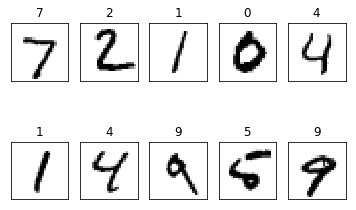

In [9]:
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()